# This script provides the graphics to "Lyapunov Stability of Consensus-Based Optimization"

### Comparison of the consensus formation of all versions of CBO

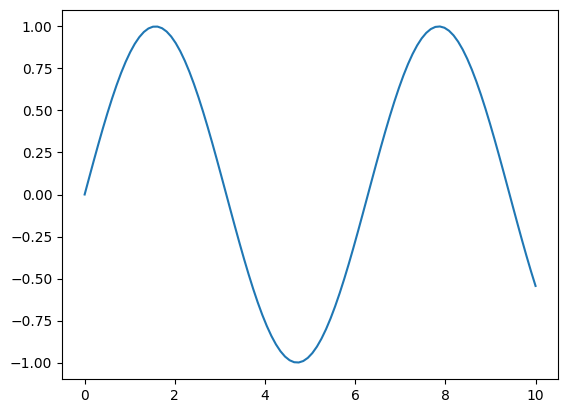

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
from matplotlib.legend_handler import HandlerTuple
import os
import numpy as np
import warnings


x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y)

In [2]:
import torch
from test_functions import *  # import all test functions
from torch.distributions import Uniform, Normal  # import initial distibution function
from visualizations import * # import all illustration functions
import CBO  # import CBO function
from IPython.display import Image

### Rastrigin function

purely determinstic system

In [ ]:
objective = rastrigin_c(10)  # test function to optimize
# objective = rosenbrock
# objective = discontinuous_exp
dimensionality = 2  # dimension of the problem
n_particles = 100  # number of agents
initial_distribution = Uniform(-5,5)  # initial distribution function
dt = 0.05  # step size of discretization
l = 1  # lambda (drift paramter)
sigma = 0  # sigma (diffusion parameter)
alpha = 100  # alpha (consensus weight)
anisotropic = True  # anisotropic CBO
n_particles_batches = 1  # batch size of each batch
epochs = 100  # number of iteration od SDE solution scheme (M)
batch_size = None
time_horizon = None
SDE_method = 'Euler_Maruyama'  # SDE solution scheme 
time = np.linspace(0, dt * epochs, epochs + 1)  # time horizon discretized

In [35]:
# run CBO approximation
minimizer, trajectory = CBO.minimize(
        # CBO parameter
        objective, dimensionality, n_particles, initial_distribution, 
        dt, l, sigma, alpha, anisotropic, SDE_method,
        batch_size, n_particles_batches, epochs, time_horizon,
        # Optimization modifications parameters
        use_partial_update=False, use_additional_random_shift=False, use_additional_gradients_shift=False,
        random_shift_epsilon=None, gradients_shift_gamma=None,
        # Additional optional arguments
        best_particle_alpha=1e5, use_gpu_if_available=False, return_trajectory=True, cooling=False)

In [36]:
# generate gif of CBO particle evolution and extract snapshots of specific timestamps
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
visualize_trajectory_2d(trajectory, objective, dt, x_range=(-6.5, 6.5), y_range=(-6.5,6.5), elev_deg=90, azim_deg=90, screenshot_times=[0.0, 0.75, 2.0, 4.95], 
                        output_path = 'images/rastrigin_deterministic.gif', screenshot_dir = 'images/rastrigin_deterministic_screenshots', 
                        summary_title='Particle evolution purely deterministic system')

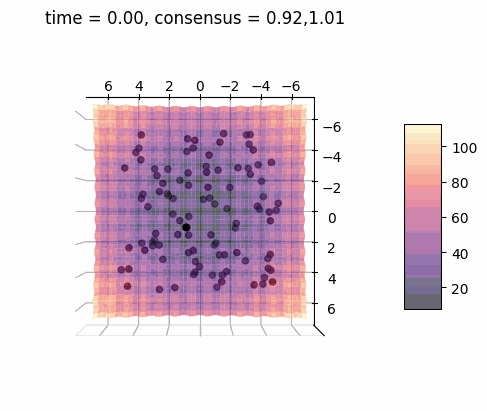

In [37]:
Image(filename='images/rastrigin_deterministic.gif') # display gif

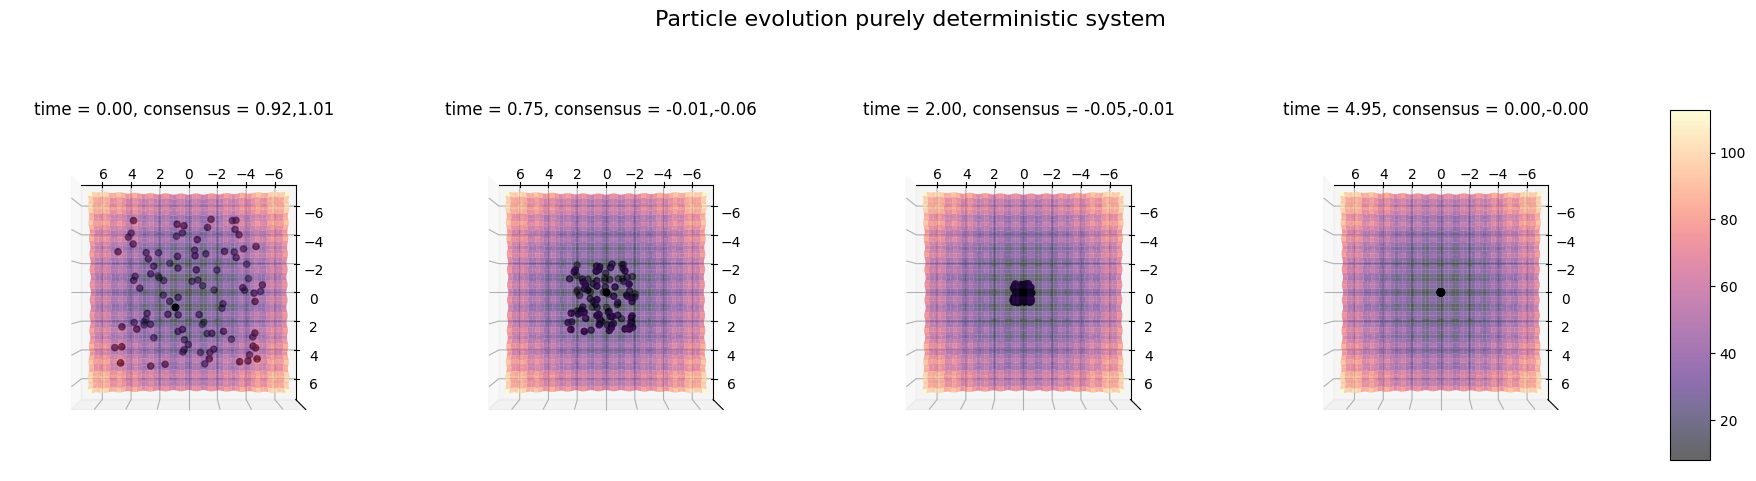

In [38]:
Image(filename='images/rastrigin_deterministic_screenshots_row.png', width = 800) # display gif

In [39]:
# computation evolution of the norm of the projected particle system 
norm_projected_particles_deterministic = []

for trajectory_point in trajectory:

    V = trajectory_point['V']
    # calculate norm of projected particles
    V_centered = V - V.mean(axis=0)  # substract dimensionwise mean of each particle
    norm_projected_particles_deterministic.append(torch.sum(V_centered ** 2))  # sum squared entries


# computation of ecxponential convergence bound
convergence_bound_deterministic = norm_projected_particles_deterministic[0] * np.exp(-(2 * l - sigma ** 2) * time)
log_convergence_bound_deterministic = - (l + 1/2 * sigma**2) * time + 0.5 * torch.log(norm_projected_particles_deterministic[0]).item()


stochastic system, where $\displaystyle 2\lambda > \sigma^2$.

In [40]:
sigma = 1  # sigma (diffusion parameter)

In [41]:
# run CBO approximation
minimizer, trajectory = CBO.minimize(
        # CBO parameter
        objective, dimensionality, n_particles, initial_distribution, 
        dt, l, sigma, alpha, anisotropic, SDE_method,
        batch_size, n_particles_batches, epochs, time_horizon,
        # Optimization modifications parameters
        use_partial_update=False, use_additional_random_shift=False, use_additional_gradients_shift=False,
        random_shift_epsilon=None, gradients_shift_gamma=None,
        # Additional optional arguments
        best_particle_alpha=1e5, use_gpu_if_available=False, return_trajectory=True, cooling=False)

In [42]:
# generate gif of CBO particle evolution and extract snapshots of specific timestamps
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
visualize_trajectory_2d(trajectory, objective, dt, x_range=(-6.5, 6.5), y_range=(-6.5,6.5), elev_deg=90, azim_deg=90, screenshot_times=[0.0, 0.75, 2.0, 4.95], 
                        output_path = 'images/rastrigin_stochastic_stability_condition_satisfied.gif', screenshot_dir = 'images/rastrigin_stochastic_stability_condition_satisfied_screenshots', 
                        summary_title=r'Particle evolution stochastic system with stability condition: $ 2\lambda > \sigma^2$')

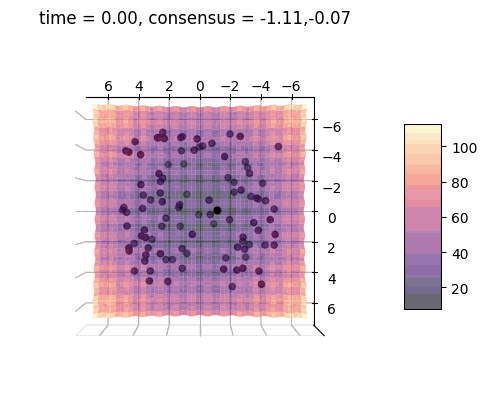

In [43]:
Image(filename='images/rastrigin_stochastic_stability_condition_satisfied.gif') # display gif

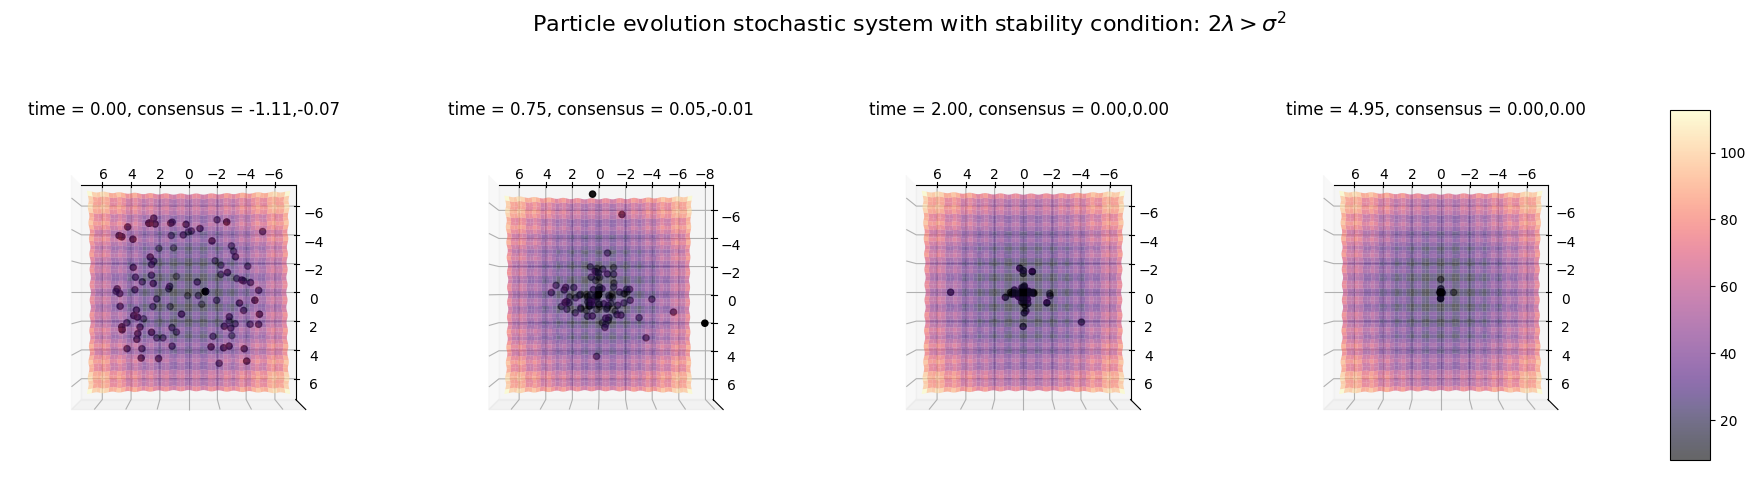

In [44]:
Image(filename='images/rastrigin_stochastic_stability_condition_satisfied_screenshots_row.png', width = 800) # display gif

In [45]:
# computation evolution of the norm of the projected particle system 
norm_projected_particles_stochastic_stability_condition_satisfied = []

for trajectory_point in trajectory:

    V = trajectory_point['V']
    # calculate norm of projected particles
    V_centered = V - V.mean(axis=0)  # substract dimensionwise mean of each particle
    norm_projected_particles_stochastic_stability_condition_satisfied.append(torch.sum(V_centered ** 2))  # sum squared entries

# computation of ecxponential convergence bound
convergence_bound_stochastic_stability_condition_satisfied = norm_projected_particles_stochastic_stability_condition_satisfied[0] * np.exp(-(2 * l - sigma ** 2) * time)
log_convergence_bound_stochastic_stability_condition_satisfied = - (l + 1/2 * sigma**2) * time + 0.5 * torch.log(norm_projected_particles_stochastic_stability_condition_satisfied[0]).item()

stochastic system, where $\displaystyle 2\lambda < \sigma^2$.

In [46]:
sigma = np.sqrt(2.1)  # sigma (diffusion parameter)

In [47]:
minimizer, trajectory = CBO.minimize(
        # CBO parameter
        objective, dimensionality, n_particles, initial_distribution, 
        dt, l, sigma, alpha, anisotropic, SDE_method,
        batch_size, n_particles_batches, epochs, time_horizon,
        # Optimization modifications parameters
        use_partial_update=False, use_additional_random_shift=False, use_additional_gradients_shift=False,
        random_shift_epsilon=None, gradients_shift_gamma=None,
        # Additional optional arguments
        best_particle_alpha=1e5, use_gpu_if_available=False, return_trajectory=True, cooling=False)

In [48]:
# generate gif of CBO particle evolution and extract snapshots of specific timestamps
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
visualize_trajectory_2d(trajectory, objective, dt, x_range=(-6.5, 6.5), y_range=(-6.5,6.5), elev_deg=90, azim_deg=90, screenshot_times=[0.0, 0.75, 2.0, 4.95], 
                        output_path = 'images/rastrigin_stochastic_stability_condition_unsatisfied.gif', screenshot_dir = 'images/rastrigin_stochastic_stability_condition_unsatisfied_screenshots', 
                        summary_title=r'Particle evolution sochastic system without stability condition: $2\lambda < \sigma^2$')

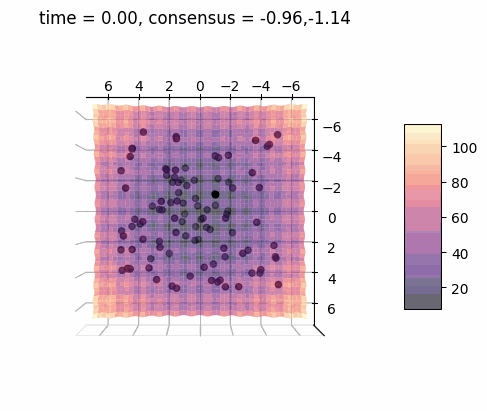

In [49]:
Image(filename='images/rastrigin_stochastic_stability_condition_unsatisfied.gif') # display gif

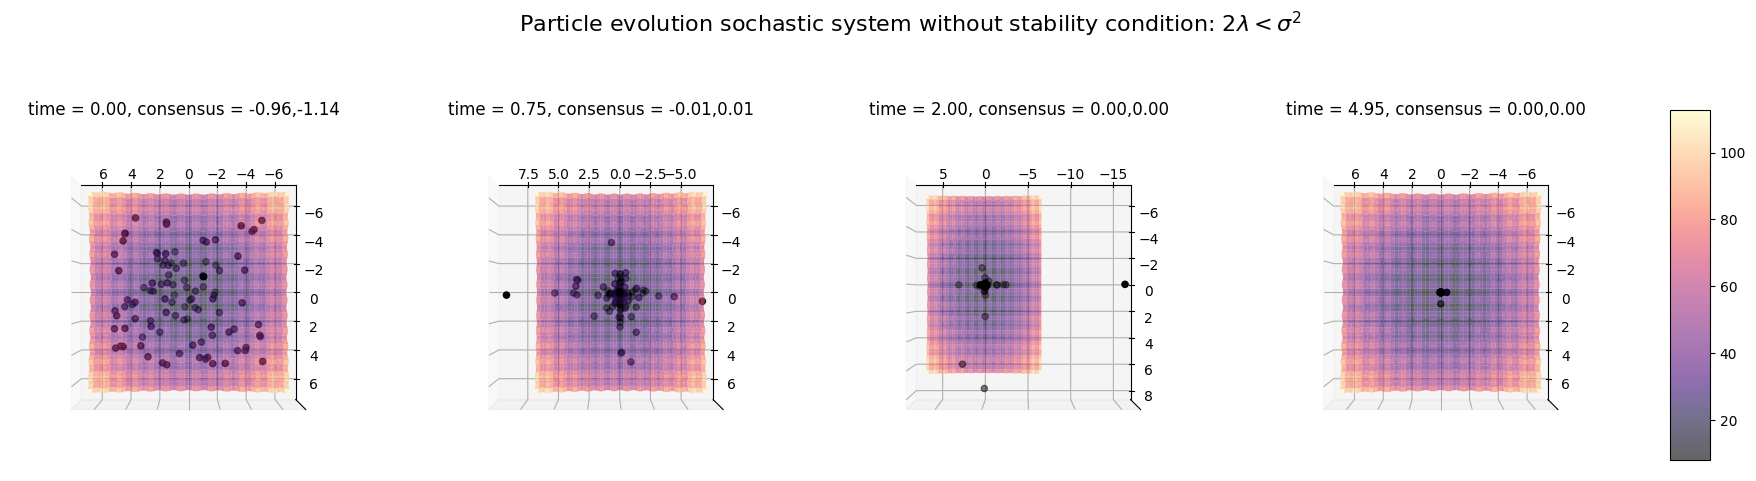

In [50]:
Image(filename='images/rastrigin_stochastic_stability_condition_unsatisfied_screenshots_row.png', width = 800) # display gif

In [51]:
# computation evolution of the norm of the projected particle system 
norm_projected_particles_stochastic_stability_condition_unsatisfied = []

for trajectory_point in trajectory:

    V = trajectory_point['V']
    # calculate norm of projected particles
    V_centered = V - V.mean(axis=0)  # substract dimensionwise mean of each particle
    norm_projected_particles_stochastic_stability_condition_unsatisfied.append(torch.sum(V_centered ** 2))  # sum squared entries

log_convergence_bound_stochastic_stability_condition_unsatisfied = - (l + 1/2 * sigma**2) * time + 0.5 * torch.log(norm_projected_particles_stochastic_stability_condition_unsatisfied[0]).item()

#### Comparison of the evolution of the norm of the projected particle system

In [24]:
### Comparison of the evolution of the norm of the projected particle system 
plt.plot(time, norm_projected_particles_deterministic, label='deterministic system', color='blue') 
plt.plot(time, convergence_bound_deterministic, color='blue', linestyle='--', alpha=0.4)
plt.plot(time, norm_projected_particles_stochastic_stability_condition_satisfied, label=r'stochastic system with $2\lambda > \sigma^2$', color='green') 
plt.plot(time, convergence_bound_stochastic_stability_condition_satisfied, color='green', linestyle='--', alpha=0.4) 
plt.plot(time, norm_projected_particles_stochastic_stability_condition_unsatisfied, label=r'stochastic system with $2\lambda \leq \sigma^2$', color='red') 
plt.xlabel('time')
plt.ylabel(r'$\|E_t\|^2$')
plt.title(r'Evolution of $\|E_t\|^2$ over Time')

# proper legend
dashed_blue = Line2D([0], [0], color='blue', linestyle='--', alpha=0.4)
dashed_green = Line2D([0], [0], color='green', linestyle='--', alpha=0.4)
blue_line = Line2D([0], [0], color='blue', linewidth=2)
green_line = Line2D([0], [0], color='green', linewidth=2)
red_line = Line2D([0], [0], color='red', linewidth=2)
handles = [
    blue_line,
    green_line,
    red_line,
    (dashed_blue, dashed_green) 
]
labels = [
    'deterministic system',
    r'stochastic system with $2\lambda > \sigma^2$',
    r'stochastic system with $2\lambda \leq \sigma^2$',
    r'$e^{-(2\lambda - \sigma^2)t \|E_0\|}$'
]
plt.legend(handles, labels, handler_map={tuple: HandlerTuple(ndivide=None)})

# Speichern
output_path = os.path.join('images/', 'rastrigin_norm_projected_particles_evolution.png')
plt.savefig(output_path, format='png')
plt.close()


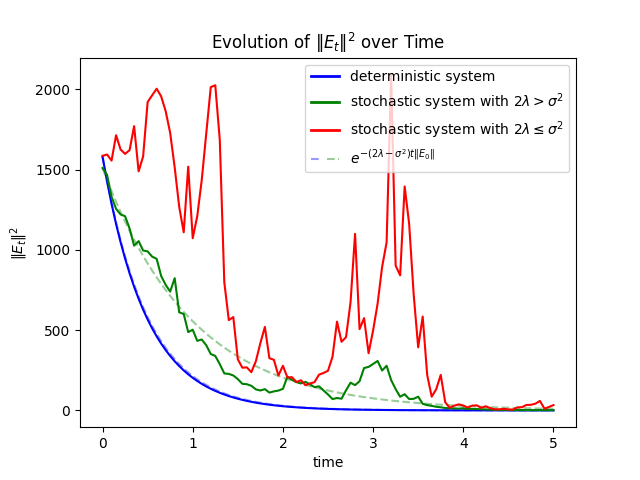

In [25]:
Image(filename='images/rastrigin_norm_projected_particles_evolution.png')

Monte-Carlo approximation for the of the evolution of the expected norm of the projected particle system

In [79]:
n_mc_samples = 1000  # number of Monte Carlo runs
mc_norm_projected_particles_stochastic_stability_condition_satisfied_all = []
mc_norm_projected_particles_stochastic_stability_condition_unsatisfied_all = []

for _ in range(n_mc_samples):
    # ----- condition satisfied -----
    sigma = 1  # sigma (diffusion parameter) with stability condition satisfied
    minimizer, trajectory = CBO.minimize(
        objective, dimensionality, n_particles, initial_distribution, 
        dt, l, sigma, alpha, anisotropic, SDE_method,
        batch_size, n_particles_batches, epochs, time_horizon,
        use_partial_update=False, use_additional_random_shift=False, use_additional_gradients_shift=False,
        random_shift_epsilon=None, gradients_shift_gamma=None,
        best_particle_alpha=1e5, use_gpu_if_available=False, return_trajectory=True, cooling=False
    )

    norm_projected_particles_sat = []

    for trajectory_point in trajectory:
        V = trajectory_point['V']
        V_centered = V - V.mean(axis=0)
        norm_projected_particles_sat.append(torch.sum(V_centered ** 2))

    mc_norm_projected_particles_stochastic_stability_condition_satisfied_all.append(norm_projected_particles_sat)


    # ----- condition unsatisfied -----
    sigma = np.sqrt(2.1)  # sigma (diffusion parameter) with stability condition unsatisfied
    minimizer, trajectory = CBO.minimize(
        objective, dimensionality, n_particles, initial_distribution, 
        dt, l, sigma, alpha, anisotropic, SDE_method,
        batch_size, n_particles_batches, epochs, time_horizon,
        use_partial_update=False, use_additional_random_shift=False, use_additional_gradients_shift=False,
        random_shift_epsilon=None, gradients_shift_gamma=None,
        best_particle_alpha=1e5, use_gpu_if_available=False, return_trajectory=True, cooling=False
    )

    norm_projected_particles_unsat = []

    for trajectory_point in trajectory:
        V = trajectory_point['V']
        V_centered = V - V.mean(axis=0)
        norm_projected_particles_unsat.append(torch.sum(V_centered ** 2))

    mc_norm_projected_particles_stochastic_stability_condition_unsatisfied_all.append(norm_projected_particles_unsat)


# Monte-Carlo approximation
mc_norm_projected_particles_stochastic_sat_tensor = torch.tensor(mc_norm_projected_particles_stochastic_stability_condition_satisfied_all)
mc_norm_projected_particles_stochastic_sat_avg = torch.mean(mc_norm_projected_particles_stochastic_sat_tensor, dim=0).tolist()
mc_convergence_bound_stochastic_stability_condition_satisfied = mc_norm_projected_particles_stochastic_sat_avg[0] * np.exp(-(2 * l - 1 ** 2) * time)

mc_norm_projected_particles_stochastic_unsat_tensor = torch.tensor(mc_norm_projected_particles_stochastic_stability_condition_unsatisfied_all)
mc_norm_projected_particles_stochastic_unsat_avg = torch.mean(mc_norm_projected_particles_stochastic_unsat_tensor, dim=0).tolist()

In [80]:
plt.plot(time, norm_projected_particles_deterministic, label='deterministic system', color='blue') 
plt.plot(time, convergence_bound_deterministic, color='blue', linestyle='--', alpha=0.4)  
plt.plot(time, mc_norm_projected_particles_stochastic_sat_avg, label=r'stochastic system with $2\lambda > \sigma^2$', color='green') 
plt.plot(time, mc_convergence_bound_stochastic_stability_condition_satisfied, color='green', linestyle='--', alpha=0.4) 
plt.plot(time, mc_norm_projected_particles_stochastic_unsat_avg, label=r'stochastic system with $2\lambda \leq \sigma^2$', color='red') 
plt.xlabel('time')
plt.ylabel(r'$\mathbb{E} \left( \|E_t\|^2 \right)$')
plt.title(r'Monte-Carlo approximation of $\mathbb{E} \left(\|E_t\|^2\right)$ over time')

# proper legend
dashed_blue = Line2D([0], [0], color='blue', linestyle='--', alpha=0.4)
dashed_green = Line2D([0], [0], color='green', linestyle='--', alpha=0.4)
blue_line = Line2D([0], [0], color='blue', linewidth=2)
green_line = Line2D([0], [0], color='green', linewidth=2)
red_line = Line2D([0], [0], color='red', linewidth=2)
handles = [
    blue_line,
    green_line,
    red_line,
    (dashed_blue, dashed_green) 
]
labels = [
    'purely deterministic system',
    r'stochastic system with $2\lambda > \sigma^2$',
    r'stochastic system with $2\lambda \leq \sigma^2$',
    r'$e^{-(2\lambda - \sigma^2)t}$'
]
plt.legend(handles, labels, handler_map={tuple: HandlerTuple(ndivide=None)})

# Speichern
output_path = os.path.join('images/', 'rastrigin_mc_norm_projected_particles_evolution.png')
plt.savefig(output_path, format='png')
plt.close()

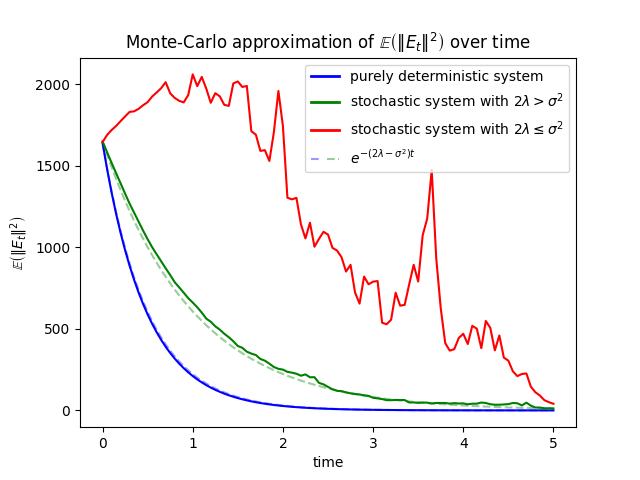

In [81]:
Image(filename='images/rastrigin_mc_norm_projected_particles_evolution.png')

In [82]:
plt.plot(time, norm_projected_particles_deterministic, label='deterministic system', color='blue') 
plt.plot(time, convergence_bound_deterministic, color='blue', linestyle='--', alpha=0.4)  
plt.plot(time, mc_norm_projected_particles_stochastic_sat_avg, label=r'stochastic system with $2\lambda > \sigma^2$', color='green') 
plt.plot(time, mc_convergence_bound_stochastic_stability_condition_satisfied, color='green', linestyle='--', alpha=0.4) 
plt.plot(time, mc_norm_projected_particles_stochastic_unsat_avg, label=r'stochastic system with $2\lambda \leq \sigma^2$', color='red') 
plt.xlabel('time')
plt.ylabel(r'$\mathbb{E} \left( \|E_t\|^2 \right)$')
plt.title(r'Monte-Carlo approximation of $\mathbb{E} \left(\|E_t\|^2\right)$ over time')

# proper legend
dashed_blue = Line2D([0], [0], color='blue', linestyle='--', alpha=0.4)
dashed_green = Line2D([0], [0], color='green', linestyle='--', alpha=0.4)
blue_line = Line2D([0], [0], color='blue', linewidth=2)
green_line = Line2D([0], [0], color='green', linewidth=2)
red_line = Line2D([0], [0], color='red', linewidth=2)
handles = [
    blue_line,
    green_line,
    red_line,
    (dashed_blue, dashed_green) 
]
labels = [
    r'$\sigma^2 = 0$',
    r'$\sigma^2 = 1$',
    r'$\sigma^2 = 2.1$',
    r'$e^{-(2\lambda - \sigma^2)t}$'
]
plt.legend(handles, labels, handler_map={tuple: HandlerTuple(ndivide=None)})

# Speichern
output_path = os.path.join('images/', 'rastrigin_mc_norm_projected_particles_evolution_2.png')
plt.savefig(output_path, format='png')
plt.close()

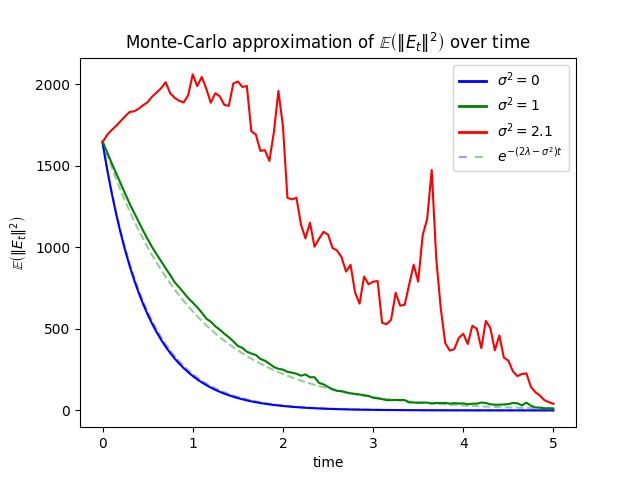

In [83]:
Image(filename='images/rastrigin_mc_norm_projected_particles_evolution_2.png')

#### Monte-Carlo comparison of the evolution of the norm of the projected particle system for (an)isotropic system

In [99]:
### diameter evolution for isotropic and anisotropic
n_mc_samples = 1000  # number of Monte Carlo runs

mc_norm_projected_particles_stochastic_isotropic_sat_all = []
mc_norm_projected_particles_stochastic_isotropic_unsat_all = []

for _ in range(n_mc_samples):
    # ----- ISOTROPIC CASE -----
    anisotropic = False
    sigma = np.sqrt(1)  # sigma (diffusion parameter) with stability condition satisfied
    minimizer, trajectory = CBO.minimize(
        objective, dimensionality, n_particles, initial_distribution, 
        dt, l, sigma, alpha, anisotropic, SDE_method,
        batch_size, n_particles_batches, epochs, time_horizon,
        use_partial_update=False, use_additional_random_shift=False, use_additional_gradients_shift=False,
        random_shift_epsilon=None, gradients_shift_gamma=None,
        best_particle_alpha=1e5, use_gpu_if_available=False, return_trajectory=True, cooling=False
    )

    norm_projected_particles_iso = []
    for trajectory_point in trajectory:
        V = trajectory_point['V']
        V_centered = V - V.mean(axis=0) 
        norm_projected_particles_iso.append(torch.sum(V_centered ** 2))
    mc_norm_projected_particles_stochastic_isotropic_sat_all.append(norm_projected_particles_iso)


    # sigma = np.sqrt(2.1)  # sigma (diffusion parameter) with stability condition unsatisfied
    # minimizer, trajectory = CBO.minimize(
    #     objective, dimensionality, n_particles, initial_distribution, 
    #     dt, l, sigma, alpha, anisotropic, SDE_method,
    #     batch_size, n_particles_batches, epochs, time_horizon,
    #     use_partial_update=False, use_additional_random_shift=False, use_additional_gradients_shift=False,
    #     random_shift_epsilon=None, gradients_shift_gamma=None,
    #     best_particle_alpha=1e5, use_gpu_if_available=False, return_trajectory=True, cooling=False
    # )

    # norm_projected_particles_iso = []
    # for trajectory_point in trajectory:
    #     V = trajectory_point['V']
    #     V_centered = V - V.mean(axis=0) 
    #     norm_projected_particles_iso.append(torch.sum(V_centered ** 2))
    # mc_norm_projected_particles_stochastic_isotropic_unsat_all.append(norm_projected_particles_iso)

# Monte-Carlo approximation
mc_norm_projected_particles_stochastic_isotropic_sat_tensor = torch.tensor(mc_norm_projected_particles_stochastic_isotropic_sat_all)
mc_norm_projected_particles_stochastic_isotropic_sat_avg = torch.mean(mc_norm_projected_particles_stochastic_isotropic_sat_tensor, dim=0)

mc_norm_projected_particles_stochastic_isotropic_unsat_tensor = torch.tensor(mc_norm_projected_particles_stochastic_isotropic_unsat_all)
mc_norm_projected_particles_stochastic_isotropic_unsat_avg = torch.mean(mc_norm_projected_particles_stochastic_isotropic_unsat_tensor, dim=0)

In [100]:
plt.plot(time, mc_norm_projected_particles_stochastic_sat_avg, label=r'anisotropic with $2\lambda > \sigma^2$', color='green') 
plt.plot(time, mc_norm_projected_particles_stochastic_unsat_avg, label=r'anisotropic with $2\lambda \leq \sigma^2$', color='red')  
plt.plot(time, mc_norm_projected_particles_stochastic_isotropic_sat_avg, label=r'isotropic with $2\lambda > \sigma^2$', color='brown') 
# plt.plot(time, mc_norm_projected_particles_stochastic_isotropic_unsat_avg, label=r'isotropic system with $2\lambda \leq \sigma^2$', color='magenta')
plt.xlabel('time')
plt.ylabel(r'$\mathbb{E} \left( \|E_t\|^2 \right)$')
# plt.title(r'Monte-Carlo Approximation of $\mathbb{E} \left(\|E_t\|^2\right)$ over Time')
plt.legend(loc='upper right')

output_path = os.path.join('images/', 'rastrigin_mc_norm_projected_particles_evolution_comparison_anisotropic.png')
plt.savefig(output_path, format='png')
plt.close()

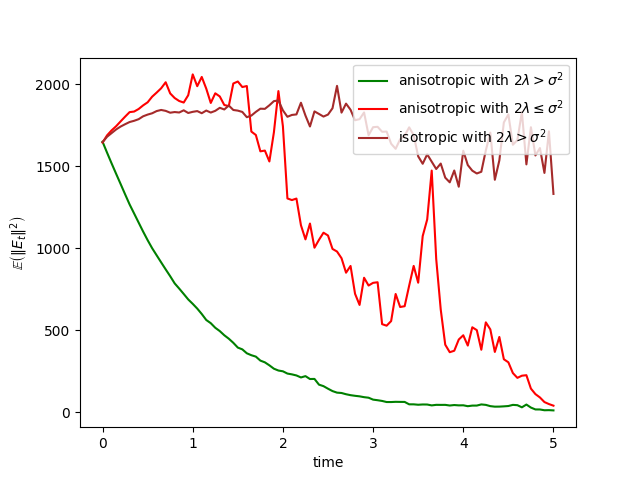

In [101]:
Image(filename='images/rastrigin_mc_norm_projected_particles_evolution_comparison_anisotropic.png')

In [90]:
### diameter evolution for isotropic and anisotropic
n_mc_samples = 1000  # number of Monte Carlo runs

mc_norm_projected_particles_stochastic_isotropic_sat_1_all = []
mc_norm_projected_particles_stochastic_isotropic_sat_2_all = []

for _ in range(n_mc_samples):
    # ----- ISOTROPIC CASE -----
    anisotropic = False
    sigma = 0  # sigma (diffusion parameter) with stability condition satisfied
    minimizer, trajectory = CBO.minimize(
        objective, dimensionality, n_particles, initial_distribution, 
        dt, l, sigma, alpha, anisotropic, SDE_method,
        batch_size, n_particles_batches, epochs, time_horizon,
        use_partial_update=False, use_additional_random_shift=False, use_additional_gradients_shift=False,
        random_shift_epsilon=None, gradients_shift_gamma=None,
        best_particle_alpha=1e5, use_gpu_if_available=False, return_trajectory=True, cooling=False
    )

    norm_projected_particles_iso = []
    for trajectory_point in trajectory:
        V = trajectory_point['V']
        V_centered = V - V.mean(axis=0) 
        norm_projected_particles_iso.append(torch.sum(V_centered ** 2))
    mc_norm_projected_particles_stochastic_isotropic_sat_1_all.append(norm_projected_particles_iso)


    sigma = np.sqrt(0.5)  # sigma (diffusion parameter) with stability condition unsatisfied
    minimizer, trajectory = CBO.minimize(
        objective, dimensionality, n_particles, initial_distribution, 
        dt, l, sigma, alpha, anisotropic, SDE_method,
        batch_size, n_particles_batches, epochs, time_horizon,
        use_partial_update=False, use_additional_random_shift=False, use_additional_gradients_shift=False,
        random_shift_epsilon=None, gradients_shift_gamma=None,
        best_particle_alpha=1e5, use_gpu_if_available=False, return_trajectory=True, cooling=False
    )

    norm_projected_particles_iso = []
    for trajectory_point in trajectory:
        V = trajectory_point['V']
        V_centered = V - V.mean(axis=0) 
        norm_projected_particles_iso.append(torch.sum(V_centered ** 2))
    mc_norm_projected_particles_stochastic_isotropic_sat_2_all.append(norm_projected_particles_iso)

# Monte-Carlo approximation
mc_norm_projected_particles_stochastic_isotropic_sat_1_tensor = torch.tensor(mc_norm_projected_particles_stochastic_isotropic_sat_1_all)
mc_norm_projected_particles_stochastic_isotropic_sat_1_avg = torch.mean(mc_norm_projected_particles_stochastic_isotropic_sat_1_tensor, dim=0)

mc_norm_projected_particles_stochastic_isotropic_sat_2_tensor = torch.tensor(mc_norm_projected_particles_stochastic_isotropic_sat_2_all)
mc_norm_projected_particles_stochastic_isotropic_sat_2_avg = torch.mean(mc_norm_projected_particles_stochastic_isotropic_sat_2_tensor, dim=0)

convergence_bound_stochastic_isotropic_sat_1 = mc_norm_projected_particles_stochastic_isotropic_sat_1_avg[0] * np.exp(-(2 * l - dimensionality * 0) * time)
convergence_bound_stochastic_isotropic_sat_2 = mc_norm_projected_particles_stochastic_isotropic_sat_2_avg[0] * np.exp(-(2 * l - dimensionality * 0.5) * time)

In [123]:
plt.plot(time, mc_norm_projected_particles_stochastic_isotropic_sat_1_avg, label=r'anisotropic system with $2\lambda > D \sigma^2$ and $\sigma^2 = 0.5$', color='blue') 
plt.plot(time, convergence_bound_stochastic_isotropic_sat_1, color='blue', linestyle='--', alpha=0.4) 
plt.plot(time, mc_norm_projected_particles_stochastic_isotropic_sat_2_avg, label=r'anisotropic system with $2\lambda > D\sigma^2$ and $\sigma^2 = 0.8$', color='magenta') 
plt.plot(time, convergence_bound_stochastic_isotropic_sat_2, color='magenta', linestyle='--', alpha=0.4) 
plt.plot(time, mc_norm_projected_particles_stochastic_isotropic_sat_avg, label=r'isotropic system with $2\lambda \leq D\sigma^2$', color='purple') 
# plt.plot(time, mc_norm_projected_particles_stochastic_isotropic_unsat_avg, label=r'isotropic system with $2\lambda \leq \sigma^2$', color='magenta')
plt.xlabel('time')
plt.ylabel(r'$\mathbb{E} \left( \|E_t\|^2 \right)$')
plt.title(r'Monte-Carlo approximation of isotropic $\mathbb{E} \left(\|E_t\|^2\right)$ over time')

dashed_magenta = Line2D([0], [0], color='blue', linestyle='--', alpha=0.4)
dashed_orange = Line2D([0], [0], color='magenta', linestyle='--', alpha=0.4)
magenta_line = Line2D([0], [0], color='blue', linewidth=2)
orange_line = Line2D([0], [0], color='magenta', linewidth=2)
brown_line = Line2D([0], [0], color='purple', linewidth=2)
handles = [
    magenta_line,
    orange_line,
    brown_line,
    (dashed_magenta, dashed_orange) 
]
labels = [
    r'$\sigma^2 = 0$',
    r'$\sigma^2 = 0.5$',
    r'$\sigma^2 = 1$',
    r'$e^{-(2\lambda - D \sigma^2)t}$'
]
plt.legend(
    handles,
    labels,
    handler_map={tuple: HandlerTuple(ndivide=None)},
    loc="center left",              # An linker Seite des Bounding Box
    bbox_to_anchor=(0.7, 0.45)         # 1 = genau rechts außerhalb, 0.5 = vertikal zentriert
)


output_path = os.path.join('images/', 'rastrigin_mc_norm_projected_particles_evolution_comparison_anisotropic.png')
plt.savefig(output_path, format='png')
plt.close()

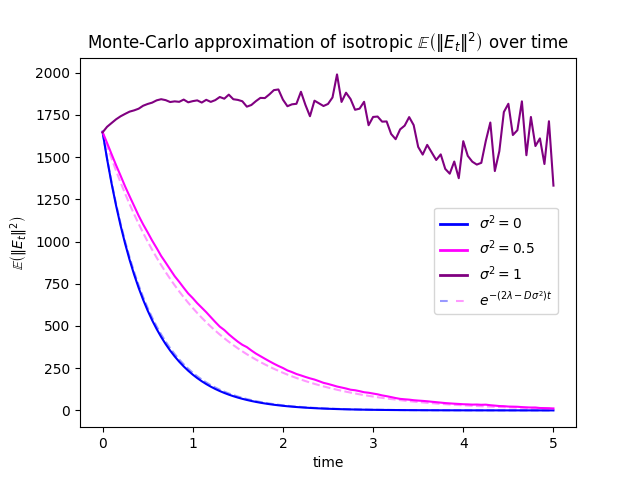

In [124]:
Image(filename='images/rastrigin_mc_norm_projected_particles_evolution_comparison_anisotropic.png')

#### Comparison of the evolution of the logarithmic norm of the projected particle system (almost sure convergence)

In [ ]:
anisotropic = True
epochs = 500  # increase the time horizon
time = np.linspace(0, dt * epochs, epochs + 1)

## deterministic system
sigma = 0  
minimizer, trajectory = CBO.minimize(
        # CBO parameter
        objective, dimensionality, n_particles, initial_distribution, 
        dt, l, sigma, alpha, anisotropic, SDE_method,
        batch_size, n_particles_batches, epochs, time_horizon,
        # Optimization modifications parameters
        use_partial_update=False, use_additional_random_shift=False, use_additional_gradients_shift=False,
        random_shift_epsilon=None, gradients_shift_gamma=None,
        # Additional optional arguments
        best_particle_alpha=1e5, use_gpu_if_available=False, return_trajectory=True, cooling=False)
norm_projected_particles_deterministic = []
for trajectory_point in trajectory:
    V = trajectory_point['V']
    V_centered = V - V.mean(axis=0)
    norm_projected_particles_deterministic.append(torch.sum(V_centered ** 2)) 
log_convergence_bound_deterministic = - (l + 1/2 * sigma**2) * time + 0.5 * torch.log(norm_projected_particles_deterministic[0]).item()


## stochastic system with stability condition satisfied
sigma = 1
minimizer, trajectory = CBO.minimize(
        # CBO parameter
        objective, dimensionality, n_particles, initial_distribution, 
        dt, l, sigma, alpha, anisotropic, SDE_method,
        batch_size, n_particles_batches, epochs, time_horizon,
        # Optimization modifications parameters
        use_partial_update=False, use_additional_random_shift=False, use_additional_gradients_shift=False,
        random_shift_epsilon=None, gradients_shift_gamma=None,
        # Additional optional arguments
        best_particle_alpha=1e5, use_gpu_if_available=False, return_trajectory=True, cooling=False)
norm_projected_particles_stochastic_stability_condition_satisfied = []
for trajectory_point in trajectory:
    V = trajectory_point['V']
    V_centered = V - V.mean(axis=0) 
    norm_projected_particles_stochastic_stability_condition_satisfied.append(torch.sum(V_centered ** 2)) 
log_convergence_bound_stochastic_stability_condition_satisfied = - (l + 1/2 * sigma**2) * time + 0.5 * torch.log(norm_projected_particles_stochastic_stability_condition_satisfied[0]).item()

## stochastic system without stability condition satisfied
sigma = np.sqrt(2.1) 
minimizer, trajectory = CBO.minimize(
        # CBO parameter
        objective, dimensionality, n_particles, initial_distribution, 
        dt, l, sigma, alpha, anisotropic, SDE_method,
        batch_size, n_particles_batches, epochs, time_horizon,
        # Optimization modifications parameters
        use_partial_update=False, use_additional_random_shift=False, use_additional_gradients_shift=False,
        random_shift_epsilon=None, gradients_shift_gamma=None,
        # Additional optional arguments
        best_particle_alpha=1e5, use_gpu_if_available=False, return_trajectory=True, cooling=False)
norm_projected_particles_stochastic_stability_condition_unsatisfied = []
for trajectory_point in trajectory:
    V = trajectory_point['V']
    V_centered = V - V.mean(axis=0) 
    norm_projected_particles_stochastic_stability_condition_unsatisfied.append(torch.sum(V_centered ** 2)) 
log_convergence_bound_stochastic_stability_condition_unsatisfied = - (l + 1/2 * sigma**2) * time + 0.5 * torch.log(norm_projected_particles_stochastic_stability_condition_unsatisfied[0]).item()

In [84]:
# proper scale of pojected particle norm
log_norm_projected_particles_deterministic = 0.5 * torch.log(torch.stack(norm_projected_particles_deterministic))
log_norm_projected_particles_stochastic_stability_condition_satisfied = 0.5 * torch.log(torch.stack(norm_projected_particles_stochastic_stability_condition_satisfied))
log_norm_projected_particles_stochastic_stability_condition_unsatisfied = 0.5 * torch.log(torch.stack(norm_projected_particles_stochastic_stability_condition_unsatisfied))

In [85]:
### Comparison of the evolution of the logarithmic norm of the projected particle system 
plt.plot(time, log_norm_projected_particles_deterministic, label='deterministic system', color='blue') 
plt.plot(time, log_convergence_bound_deterministic, color='blue', linestyle='--', alpha=0.4)
plt.plot(time, log_norm_projected_particles_stochastic_stability_condition_satisfied, label=r'stochastic system with $2\lambda > \sigma^2$', color='green') 
plt.plot(time, log_convergence_bound_stochastic_stability_condition_satisfied, color='green', linestyle='--', alpha=0.4) 
plt.plot(time, log_norm_projected_particles_stochastic_stability_condition_unsatisfied, label=r'stochastic system with $2\lambda \leq \sigma^2$', color='red') 
plt.plot(time, log_convergence_bound_stochastic_stability_condition_unsatisfied, color='red', linestyle='--', alpha=0.4) 
plt.xlabel('time')
plt.ylabel(r'$\ln \left( \|E_t\| \right)$')
plt.title(r'Evolution of $\ln \left( \|E_t\| \right)$ over Time')

# proper legend
dashed_blue = Line2D([0], [0], color='blue', linestyle='--', alpha=0.4)
dashed_green = Line2D([0], [0], color='green', linestyle='--', alpha=0.4)
dashed_red = Line2D([0], [0], color='red', linestyle='--', alpha=0.4)
blue_line = Line2D([0], [0], color='blue', linewidth=2)
green_line = Line2D([0], [0], color='green', linewidth=2)
red_line = Line2D([0], [0], color='red', linewidth=2)
handles = [
    blue_line,
    green_line,
    red_line,
    (dashed_blue, dashed_green, dashed_red) 
]
labels = [
    'deterministic system',
    r'stochastic system with $2\lambda > \sigma^2$',
    r'stochastic system with $2\lambda \leq \sigma^2$',
    r'$\left( \lambda + \frac{\sigma^2}{2} \right) t + \ln\left( \| E_{0} \| \right)$'
]
plt.legend(handles, labels, handler_map={tuple: HandlerTuple(ndivide=None)})

# Speichern
output_path = os.path.join('images/', 'rastrigin_log_norm_projected_particles_evolution.png')
plt.savefig(output_path, format='png')
plt.close()


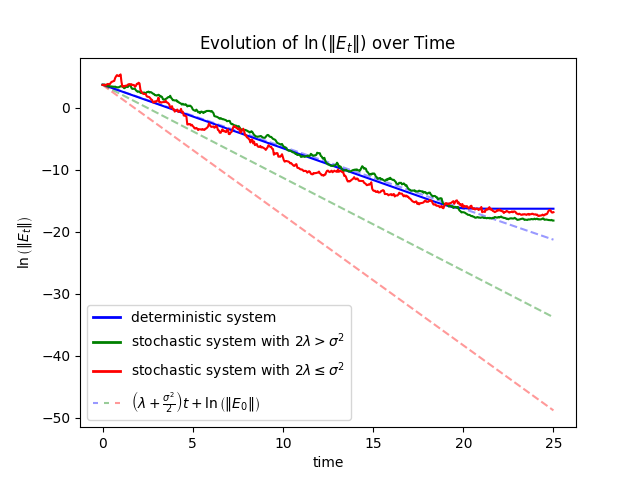

In [86]:
Image(filename='images/rastrigin_log_norm_projected_particles_evolution.png')

Monte-Carlo approximation of the evolution of the logarithmic norm of the projected particle system (almost sure convergence)

In [ ]:
n_mc_samples = 1000
epochs = 500  # increase the time horizon
time = np.linspace(0, dt * epochs, epochs + 1)

deterministic_sum = np.zeros(epochs + 1)
stable_sum = np.zeros(epochs + 1)
unstable_sum = np.zeros(epochs + 1)

for _ in range(n_mc_samples):
    # ---------- Stochastic (stability condition satisfied) ----------
    sigma = 1
    minimizer, trajectory = CBO.minimize(
        objective, dimensionality, n_particles, initial_distribution,
        dt, l, sigma, alpha, anisotropic, SDE_method,
        batch_size, n_particles_batches, epochs, time_horizon,
        use_partial_update=False, use_additional_random_shift=False, use_additional_gradients_shift=False,
        best_particle_alpha=1e5, use_gpu_if_available=False, return_trajectory=True, cooling=False
    )
    norm_proj_stable = []
    for trajectory_point in trajectory:
        V = trajectory_point['V']
        V_centered = V - V.mean(axis=0)
        norm_proj_stable.append(torch.sum(V_centered ** 2).item())
    stable_sum += np.array(norm_proj_stable)

    # ---------- Stochastic (stability condition not satisfied) ----------
    sigma = np.sqrt(2.1)
    minimizer, trajectory = CBO.minimize(
        objective, dimensionality, n_particles, initial_distribution,
        dt, l, sigma, alpha, anisotropic, SDE_method,
        batch_size, n_particles_batches, epochs, time_horizon,
        use_partial_update=False, use_additional_random_shift=False, use_additional_gradients_shift=False,
        best_particle_alpha=1e5, use_gpu_if_available=False, return_trajectory=True, cooling=False
    )
    norm_proj_unstable = []
    for trajectory_point in trajectory:
        V = trajectory_point['V']
        V_centered = V - V.mean(axis=0)
        norm_proj_unstable.append(torch.sum(V_centered ** 2).item())
    unstable_sum += np.array(norm_proj_unstable)

# Averarge over all runs
norm_projected_particles_deterministic = deterministic_sum / n_mc_samples
norm_projected_particles_stochastic_stability_condition_satisfied = stable_sum / n_mc_samples
norm_projected_particles_stochastic_stability_condition_unsatisfied = unstable_sum / n_mc_samples

In [ ]:
# proper scale of pojected particle norm
mc_log_norm_projected_particles_stochastic_stability_condition_satisfied = 0.5 * np.log(norm_projected_particles_stochastic_stability_condition_satisfied)
mc_log_norm_projected_particles_stochastic_stability_condition_unsatisfied = 0.5 * np.log(norm_projected_particles_stochastic_stability_condition_unsatisfied)

In [101]:
### Comparison of the evolution of the logarithmic norm of the projected particle system 
plt.plot(time, log_norm_projected_particles_deterministic, label='deterministic system', color='blue') 
plt.plot(time, log_convergence_bound_deterministic, color='blue', linestyle='--', alpha=0.4)
plt.plot(time, mc_log_norm_projected_particles_stochastic_stability_condition_satisfied, label=r'stochastic system with $2\lambda > \sigma^2$', color='green') 
plt.plot(time, log_convergence_bound_stochastic_stability_condition_satisfied, color='green', linestyle='--', alpha=0.4) 
plt.plot(time, mc_log_norm_projected_particles_stochastic_stability_condition_unsatisfied, label=r'stochastic system with $2\lambda \leq \sigma^2$', color='red') 
plt.plot(time, log_convergence_bound_stochastic_stability_condition_unsatisfied, color='red', linestyle='--', alpha=0.4) 
plt.xlabel('time')
plt.ylabel(r'$\ln \left( \|E_t\| \right)$')
plt.title(r'Evolution of $\ln \left( \|E_t\| \right)$ over Time')

# proper legend
dashed_blue = Line2D([0], [0], color='blue', linestyle='--', alpha=0.4)
dashed_green = Line2D([0], [0], color='green', linestyle='--', alpha=0.4)
dashed_red = Line2D([0], [0], color='red', linestyle='--', alpha=0.4)
blue_line = Line2D([0], [0], color='blue', linewidth=2)
green_line = Line2D([0], [0], color='green', linewidth=2)
red_line = Line2D([0], [0], color='red', linewidth=2)
handles = [
    blue_line,
    green_line,
    red_line,
    (dashed_blue, dashed_green, dashed_red) 
]
labels = [
    'deterministic system',
    r'stochastic system with $2\lambda > \sigma^2$',
    r'stochastic system with $2\lambda \leq \sigma^2$',
    r'$-\left( \lambda + \frac{\sigma^2}{2} \right) t + \ln\left( \| E_{0} \| \right)$'
]
plt.legend(handles, labels, handler_map={tuple: HandlerTuple(ndivide=None)})

# Speichern
output_path = os.path.join('images/', 'rastrigin_log_norm_projected_particles_evolution.png')
plt.savefig(output_path, format='png')
plt.close()


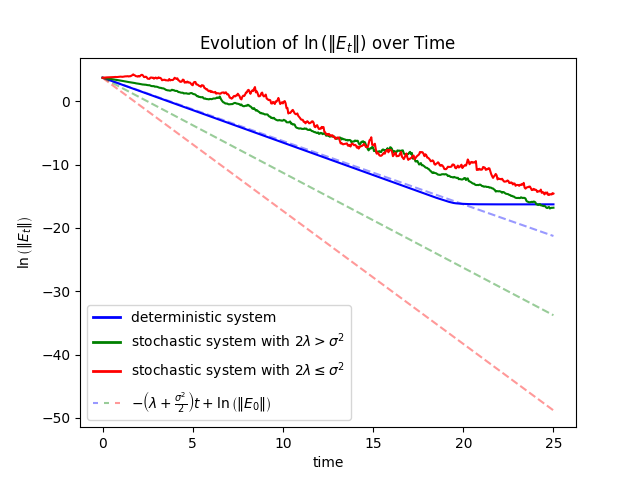

In [102]:
Image(filename='images/rastrigin_log_norm_projected_particles_evolution.png')

## Compare diameter behaviour for different particle number $N$, weight $\alpha$ and dimension $D$

In [159]:
# reset relevant parameters
anisotropic = True
epochs = 100  # increase time horizon to investigate convergence for large diffusion
time = np.linspace(0, dt * epochs, epochs + 1) 
alpha = 1000
n_particles = 100
dimensionality = 2

Monte-Carlo approximation for varying particle number $N$

In [160]:
# Number of repetitions for Monte-Carlo approximation
num_repeats = 1000

# List of particle counts
n_particles_list = list(range(10, 1001, 20))

# Definition of the four sigma strategies as functions
def sigma_strategy_0(n): return 0
def sigma_strategy_1(n): return 1
def sigma_strategy_2(n): return np.sqrt(2.1)

# List of sigma strategies with labels and LaTeX descriptions
sigma_strategies = [
    ("(a)", r'$\sigma = 0$', sigma_strategy_0),
    ("(b)", r'$\sigma = 1$', sigma_strategy_1),
    ("(c)", r'$\sigma = \sqrt{2.1}$', sigma_strategy_2)
]

# Initialize the dictionary to store results
norm_projected_particles_results = {label: [] for label, _, _ in sigma_strategies}

# Main loop over repetitions and strategies
for repeat_idx in range(num_repeats):
    print(f"Starting repeat {repeat_idx + 1} / {num_repeats}".ljust(50), end='\r', flush=True)

    for label, _, sigma_fn in sigma_strategies:
        norm_projected_particles_for_this_sigma = []

        for n_particles in n_particles_list:
            sigma = sigma_fn(n_particles)

            # CBO minimization with given parameters
            minimizer, trajectory = CBO.minimize(
                objective, dimensionality=2, n_particles=n_particles, initial_distribution=initial_distribution,
                dt=dt, l=l, sigma=sigma, alpha=1000, anisotropic=anisotropic, SDE_method=SDE_method,
                batch_size=batch_size, n_particles_batches=n_particles_batches, epochs=epochs, time_horizon=dt*epochs,
                use_partial_update=False, use_additional_random_shift=False, use_additional_gradients_shift=False,
                random_shift_epsilon=None, gradients_shift_gamma=None, best_particle_alpha=1e5,
                use_gpu_if_available=False, return_trajectory=True, cooling=False
            )

            # Calculate diameter over all time steps
            norm_projected_particles = []
            for step in trajectory:
                V = step['V']
                V_centered = V - V.mean(axis=0)
                norm_projected_particles.append(torch.sum(V_centered ** 2).item())

            norm_projected_particles_for_this_sigma.append(norm_projected_particles)

        # Save results of this repetition
        norm_projected_particles_results[label].append(np.array(norm_projected_particles_for_this_sigma))

print("\nFinished all repeats.")

# Average results over all repetitions
for label in norm_projected_particles_results:
    arr = np.array(norm_projected_particles_results[label])  # shape: (n_trajectories, len(n_particles_list), len(time))
    arr_clipped = np.clip(arr, a_min=None, a_max=45000)   # lege maximalwert fest, um funktion abzuschneiden, wenn sie zu groß wird
    norm_projected_particles_results[label] = np.mean(arr_clipped, axis=0) # Jetzt erst mitteln
    # norm_projected_particles_results[label] = np.mean(np.array(norm_projected_particles_results[label]), axis=0)  # shape: (len(n_particles_list), len(time))
    # norm_projected_particles_results[label] = np.clip(norm_projected_particles_results[label],
                                                     # a_min=None,   # kein Minimum 
                                                     # a_max=15000 # Maximalwert
                                                     # )

# Global minimum and maximum values for logarithmic color scale
all_data = np.concatenate([norm_projected_particles_results[label] for label in norm_projected_particles_results])
vmin = np.min(all_data[np.nonzero(all_data)])
vmax = np.max(all_data)

# Create 3D plots
fig = plt.figure(figsize=(16, 7))
norm = colors.LogNorm(vmin=vmin, vmax=vmax)
cmap = plt.cm.plasma

gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1], wspace=0.2) 

# Loop over all strategies to create subplots
for idx, (label, sigma_label, _) in enumerate(sigma_strategies):
    ax = fig.add_subplot(gs[0, idx], projection='3d')

    Z = norm_projected_particles_results[label]
    X, Y = np.meshgrid(time, n_particles_list)

    surf = ax.plot_surface(X, Y, Z, cmap=cmap, norm=norm, edgecolor='none', antialiased=True)

    ax.set_title(f'{label}', loc='left', fontsize=13, fontweight='bold')
    ax.set_xlabel('time')
    ax.set_ylabel('number of particles')
    ax.set_zlabel(r'$\mathbb{E} \left( \|E_t\|^2 \right)$')
    ax.view_init(elev=30, azim=-60)

# Colorbar (logarithmic scale)
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)
cbar.set_label(r'$\mathbb{E} \left( \|E_t\|^2 \right)$ (log scale)')

plt.subplots_adjust(left=0.12, right=0.88, top=0.90, bottom=0.07, wspace=0.35)

# Title and legend description
fig.suptitle(r'Monte-Carlo Approximation of $\mathbb{E} \left(\|E_t\|^2\right)$ for varying Number of Particles $N$', fontsize=16, y=0.9)
fig.text(0.8, 0.9, r'$\sigma$ values:', fontsize=13, fontweight='bold', va='top')
for i, (label, sigma_label, _) in enumerate(sigma_strategies):
    fig.text(0.8, 0.85 - i * 0.05, f'{label} {sigma_label}', fontsize=12, va='top')

# Adjust layout and save figure
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    plt.tight_layout(rect=[0, 0, 0.9, 0.95])

os.makedirs('images', exist_ok=True)
output_path = os.path.join('images/rastrigin_norm_projected_particles_by_n_particles_MC.png')
fig.savefig(output_path, bbox_inches='tight')
plt.close()


Starting repeat 1000 / 1000                       
Finished all repeats.


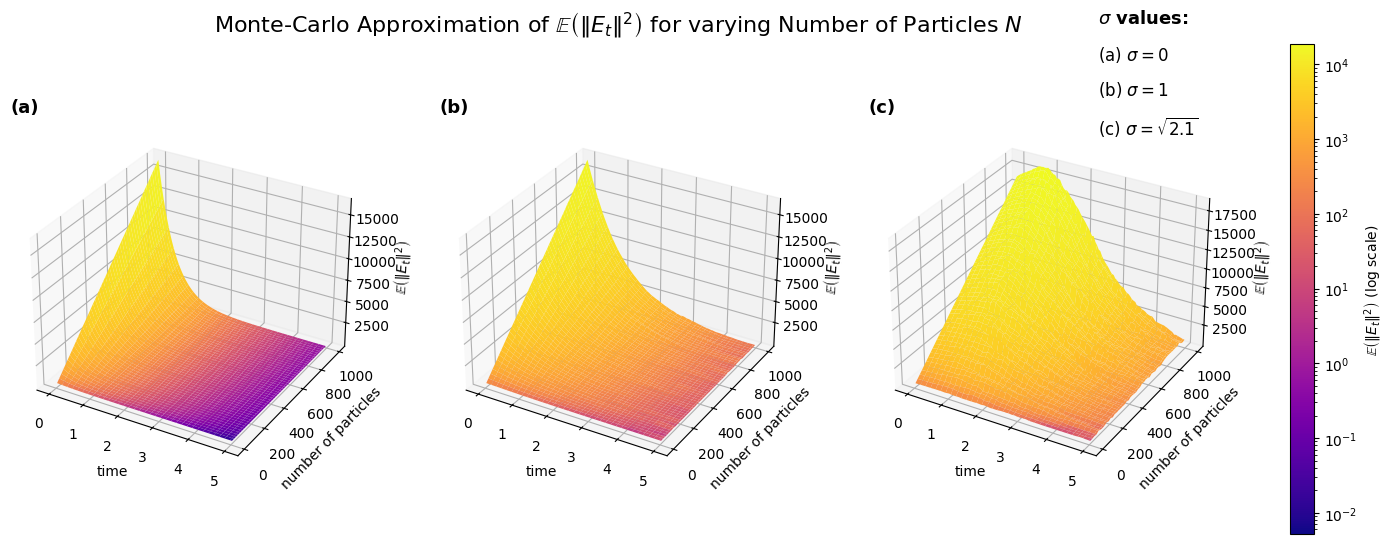

In [161]:
Image(filename=os.path.join('images/rastrigin_norm_projected_particles_by_n_particles_MC.png'), width = 1000)

Monte-Carlo approximation for varying weight parameter $\alpha$

In [162]:
n_particles = 100
dimensionality = 2

# Number of repetitions for Monte-Carlo approximation
num_repeats = 1000

# List of alpha values
alpha_list = list(range(1, 1001, 20))

# Definition of the four sigma strategies as functions
def sigma_strategy_0(n): return 0
def sigma_strategy_1(n): return 1
def sigma_strategy_2(n): return np.sqrt(2.1)

# List of sigma strategies with labels and LaTeX descriptions
sigma_strategies = [
    ("(a)", r'$\sigma = 0$', sigma_strategy_0),
    ("(b)", r'$\sigma = 1$', sigma_strategy_1),
    ("(c)", r'$\sigma = \sqrt{2.1}$', sigma_strategy_2)
]

# Initialize the dictionary to store results
norm_projected_particles_results = {label: [] for label, _, _ in sigma_strategies}

# Main loop over repetitions and strategies
for repeat_idx in range(num_repeats):
    print(f"Starting repeat {repeat_idx + 1} / {num_repeats}".ljust(50), end='\r', flush=True)

    for label, _, sigma_fn in sigma_strategies:
        norm_projected_particles_for_this_sigma = []

        for alpha in alpha_list:
            sigma = sigma_fn(n_particles)  # n_particles_fixed must be defined

            # CBO minimization with varying alpha
            minimizer, trajectory = CBO.minimize(
                objective, dimensionality=2, n_particles=n_particles, initial_distribution=initial_distribution,
                dt=dt, l=l, sigma=sigma, alpha=alpha, anisotropic=anisotropic, SDE_method=SDE_method,
                batch_size=batch_size, n_particles_batches=n_particles_batches, epochs=epochs, time_horizon=dt*epochs,
                use_partial_update=False, use_additional_random_shift=False, use_additional_gradients_shift=False,
                random_shift_epsilon=None, gradients_shift_gamma=None, best_particle_alpha=1e5,
                use_gpu_if_available=False, return_trajectory=True, cooling=False
            )

            # Calculate diameter over all time steps
            norm_projected_particles = []
            for step in trajectory:
                V = step['V']
                V_centered = V - V.mean(axis=0)
                norm_projected_particles.append(torch.sum(V_centered ** 2).item())

            norm_projected_particles_for_this_sigma.append(norm_projected_particles)

        # Save results of this repetition
        norm_projected_particles_results[label].append(np.array(norm_projected_particles_for_this_sigma))

print("\nFinished all repeats.")

# Average results over all repetitions
for label in norm_projected_particles_results:
    arr = np.array(norm_projected_particles_results[label])  # shape: (n_trajectories, len(n_particles_list), len(time))
    arr_clipped = np.clip(arr, a_min=None, a_max=4500)   # lege maximalwert fest, um funktion abzuschneiden, wenn sie zu groß wird
    norm_projected_particles_results[label] = np.mean(arr_clipped, axis=0) # Jetzt erst mitteln

# Global minimum and maximum values for logarithmic color scale
all_data = np.concatenate([norm_projected_particles_results[label] for label in norm_projected_particles_results])
vmin = np.min(all_data[np.nonzero(all_data)])
vmax = np.max(all_data)

# Create 3D plots
fig = plt.figure(figsize=(16, 7))
norm = colors.LogNorm(vmin=vmin, vmax=vmax)
cmap = plt.cm.plasma

gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1], wspace=0.2) 

# Loop over all strategies to create subplots
for idx, (label, sigma_label, _) in enumerate(sigma_strategies):
    ax = fig.add_subplot(gs[0, idx], projection='3d')

    Z = norm_projected_particles_results[label]
    X, Y = np.meshgrid(time, alpha_list)

    surf = ax.plot_surface(X, Y, Z, cmap=cmap, norm=norm, edgecolor='none', antialiased=True)

    ax.set_title(f'{label}', loc='left', fontsize=13, fontweight='bold')
    ax.set_xlabel('time')
    ax.set_ylabel(r'$\alpha$')
    ax.set_zlabel(r'$\mathbb{E} \left( \|E_t\|^2 \right)$')
    ax.view_init(elev=30, azim=-60)

# Colorbar (logarithmic scale)
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)
cbar.set_label(r'$\mathbb{E} \left( \|E_t\|^2 \right)$ (log scale)')

plt.subplots_adjust(left=0.12, right=0.88, top=0.90, bottom=0.07, wspace=0.35)

# Title and legend description
fig.suptitle(r'Monte-Carlo Approximation of $\mathbb{E} \left(\|E_t\|^2\right)$ for varying Weight Parameter $\alpha$', fontsize=16, y=0.9)
fig.text(0.8, 0.9, r'$\sigma$ values:', fontsize=13, fontweight='bold', va='top')
for i, (label, sigma_label, _) in enumerate(sigma_strategies):
    fig.text(0.8, 0.85 - i * 0.05, f'{label} {sigma_label}', fontsize=12, va='top')

# Adjust layout and save figure
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    plt.tight_layout(rect=[0, 0, 0.9, 0.95])

os.makedirs('images', exist_ok=True)
output_path = os.path.join('images/rastrigin_norm_projected_particles_by_alpha_MC.png')
fig.savefig(output_path, bbox_inches='tight')
plt.close()


Starting repeat 1000 / 1000                       
Finished all repeats.


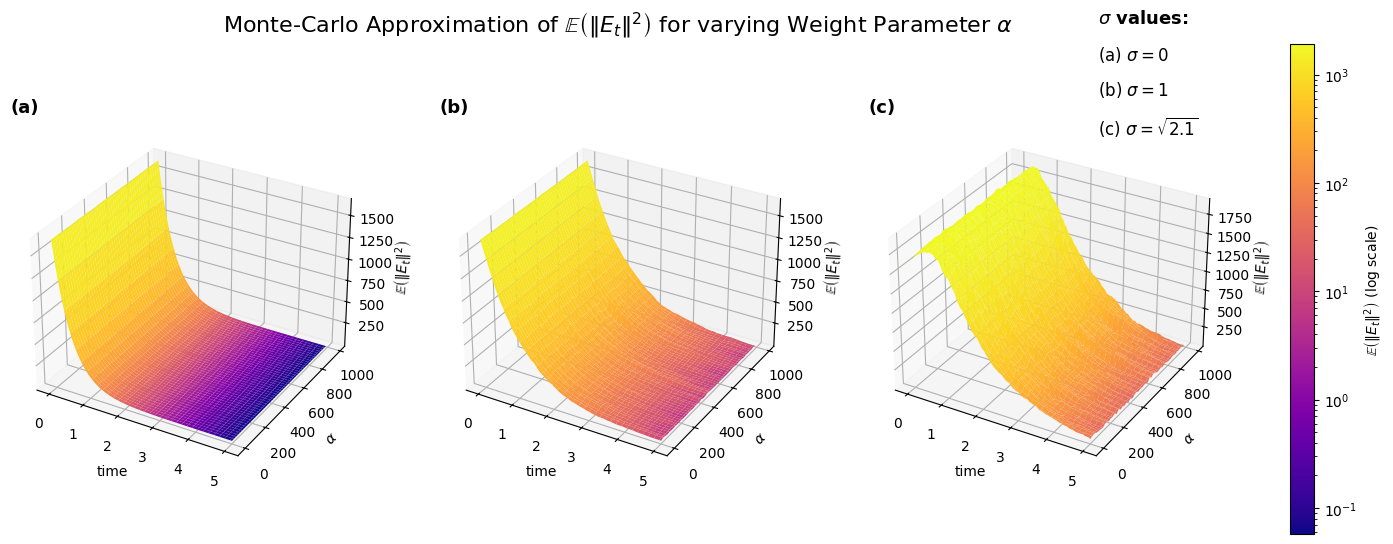

In [163]:
Image(filename=os.path.join('images/rastrigin_norm_projected_particles_by_alpha_MC.png'), width = 1000)

Monte-Carlo approximation for varying dimensionality $D$

In [164]:
# reset relevant parameters
alpha = 10
n_particles = 1000

# Number of repetitions for Monte-Carlo approximation
num_repeats = 1000

# List of dimensionalities to test
dimensionality_list = list(range(1, 201, 10))

# Define the four sigma strategies
def sigma_strategy_0(n,d): return 0
def sigma_strategy_1(n,d): return 1
def sigma_strategy_2(n,d): return np.sqrt(2.1)

sigma_strategies = [
    ("(a)", r'$\sigma = 0$', sigma_strategy_0),
    ("(b)", r'$\sigma = 1$', sigma_strategy_1),
    ("(c)", r'$\sigma = \sqrt{2.1}$', sigma_strategy_2)
]

# Dictionary to store the results
norm_projected_particles_results = {label: [] for label, _, _ in sigma_strategies}

# Main loop over repetitions and strategies
for repeat_idx in range(num_repeats):
    print(f"Starting repeat {repeat_idx + 1} / {num_repeats}".ljust(50), end='\r', flush=True)

    for label, _, sigma_fn in sigma_strategies:
        norm_projected_particles_for_this_sigma = []

        for d in dimensionality_list:
            sigma = sigma_fn(n_particles, d)  # n_particles fixed across all runs

            minimizer, trajectory = CBO.minimize(
                objective, dimensionality=d, n_particles=n_particles, initial_distribution=initial_distribution,
                dt=dt, l=l, sigma=sigma, alpha=alpha, anisotropic=anisotropic, SDE_method=SDE_method,
                batch_size=batch_size, n_particles_batches=n_particles_batches, epochs=epochs, time_horizon=dt*epochs,
                use_partial_update=False, use_additional_random_shift=False, use_additional_gradients_shift=False,
                random_shift_epsilon=None, gradients_shift_gamma=None, best_particle_alpha=1e5,
                use_gpu_if_available=False, return_trajectory=True, cooling=False
            )

            norm_projected_particles = []
            for step in trajectory:
                V = step['V']
                V_centered = V - V.mean(axis=0)
                norm_projected_particles.append(torch.sum(V_centered ** 2).item())

            norm_projected_particles_for_this_sigma.append(norm_projected_particles)

        norm_projected_particles_results[label].append(np.array(norm_projected_particles_for_this_sigma))

print("\nFinished all repeats.")

# Average over all repetitions
for label in norm_projected_particles_results:
    arr = np.array(norm_projected_particles_results[label])  # shape: (n_trajectories, len(n_particles_list), len(time))
    arr_clipped = np.clip(arr, a_min=None, a_max=4.2 * 1e6)   # lege maximalwert fest, um funktion abzuschneiden, wenn sie zu groß wird
    norm_projected_particles_results[label] = np.mean(arr_clipped, axis=0) # Jetzt erst mitteln

# Determine global min/max for log scale
all_data = np.concatenate([norm_projected_particles_results[label] for label in norm_projected_particles_results])
vmin = np.min(all_data[np.nonzero(all_data)])
vmax = np.max(all_data)

# --- Plotting ---
fig = plt.figure(figsize=(16, 7))
norm = colors.LogNorm(vmin=vmin, vmax=vmax)
cmap = plt.cm.plasma

gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1], wspace=0.2) 

for idx, (label, sigma_label, _) in enumerate(sigma_strategies):
    ax = fig.add_subplot(gs[0, idx], projection='3d')

    Z = norm_projected_particles_results[label]
    X, Y = np.meshgrid(time, dimensionality_list)

    surf = ax.plot_surface(X, Y, Z, cmap=cmap, norm=norm, edgecolor='none', antialiased=True)

    ax.set_title(f'{label}', loc='left', fontsize=13, fontweight='bold')
    ax.set_xlabel('time')
    ax.set_ylabel('dimensionality')
    ax.set_zlabel(r'$\mathbb{E} \left( \|E_t\|^2 \right)$')
    ax.view_init(elev=30, azim=-60)

# Colorbar (logarithmic)
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)
cbar.set_label(r'$\mathbb{E} \left( \|E_t\|^2 \right)$ (log scale)')

plt.subplots_adjust(left=0.12, right=0.88, top=0.90, bottom=0.07, wspace=0.35)

# Title and sigma strategy legend
fig.suptitle(r'Monte-Carlo Approximation of $\mathbb{E} \left(\|E_t\|^2\right)$ for varying Problem Dimension $D$', fontsize=16, y=0.9)
fig.text(0.8, 0.9, r'$\sigma$ values:', fontsize=13, fontweight='bold', va='top')
for i, (label, sigma_label, _) in enumerate(sigma_strategies):
    fig.text(0.8, 0.85 - i * 0.05, f'{label} {sigma_label}', fontsize=12, va='top')

# Final layout and save
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    plt.tight_layout(rect=[0, 0, 0.9, 0.95])

os.makedirs('images', exist_ok=True)
output_path = os.path.join('images/rastrigin_norm_projected_particles_by_dimensionality_MC.png')
fig.savefig(output_path, bbox_inches='tight')
plt.close()


Starting repeat 1000 / 1000                       
Finished all repeats.


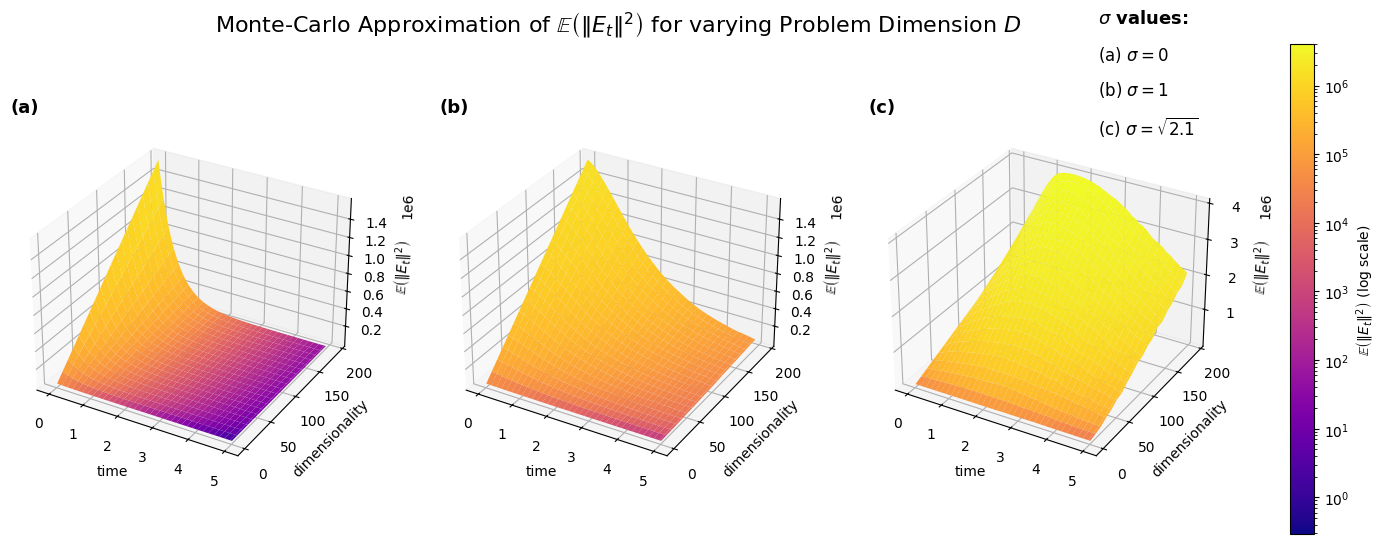

In [165]:
Image(filename=os.path.join('images/rastrigin_norm_projected_particles_by_dimensionality_MC.png'), width = 1000)

## QR-Code

In [1]:
import qrcode

url = "https://github.com/jaheieck/Exponential-Stability-of-Finite-N-Consensus-Based-Optimization/raw/main/Exponential_Stability_of_Finite-N_CBO.pdf"

qr = qrcode.QRCode(version=1, box_size=10, border=4)
qr.add_data(url)
qr.make(fit=True)
img = qr.make_image(fill_color="black", back_color="white")
img.save("preprint_qr.png")
